# Preprocess

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/NLP 7th sem/dataset/Sarcasm_Headlines_Dataset_v2.json', lines = True)
print(df.shape)

df.head()

(28619, 3)


,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [8]:
text_corpus = df['headline'].apply(preprocess)

In [9]:
text_corpus[0]

'thirtysomething scientist unveil doomsday clock hair loss'

In [10]:
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(stop_words='english')

vectorized_corpus = vectorizer.fit_transform(text_corpus)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_corpus.toarray())


In [11]:
# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=9,
				max_iter=500, random_state=42)
kmeans.fit(vectorized_corpus)



KMeans(max_iter=500, n_clusters=2, n_init=9, random_state=42)

In [12]:
# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = text_corpus
results['cluster'] = kmeans.labels_




In [18]:
results.head()

,document,cluster
0,thirtysomething scientist unveil doomsday cloc...,0
1,dem rep totally nail congress fall short gende...,0
2,eat veggie 9 deliciously different recipe,0
3,inclement weather prevent liar get work,0
4,mother come pretty close word stream correctly,0


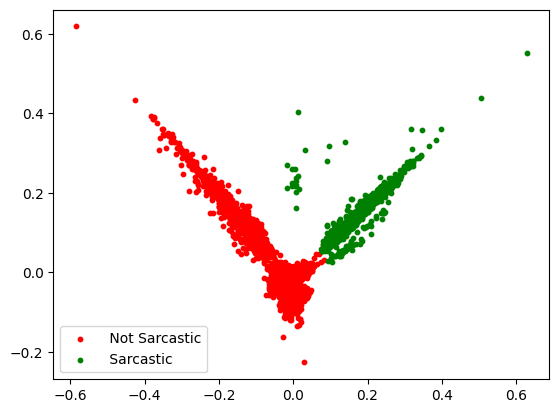

In [14]:
# plot the results
colors = ['red', 'green']
cluster = ['Not Sarcastic','Sarcastic']
for i in range(num_clusters):
	plt.scatter(reduced_data[kmeans.labels_ == i, 0],
				reduced_data[kmeans.labels_ == i, 1],
				s=10, color=colors[i],
				label=f' {cluster[i]}')
plt.legend()
plt.show()
